<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork971-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# <font color='green'> Model Evaluation and Refinement</font>


Estimated time needed: **30** minutes
    

## Objectives

After completing this lab you will be able to:

* Evaluate and refine prediction models


<h2>Table of Contents</h2>
<ul>
    <li><a href="#ref1">Model Evaluation </a></li>
    <li><a href="#ref2">Over-fitting, Under-fitting and Model Selection </a></li>
    <li><a href="#ref3">Ridge Regression </a></li>
    <li><a href="#ref4">Grid Search</a></li>
</ul>


In [1]:
import pandas as pd
import numpy as np

# Import clean data 
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/module_5_auto.csv'
df = pd.read_csv(path)

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
df.to_csv('module_5_auto.csv')

 First, let's only use numeric data:


In [3]:
pd.set_option('display.max_columns',999)
df=df._get_numeric_data()
df.head()

,Unnamed: 0.1,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


 Libraries for plotting:


In [4]:
from ipywidgets import interact, interactive, fixed, interact_manual

<h2>Functions for Plotting</h2>


In [5]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.kdeplot(RedFunction, fill=False, color="r", label=RedName)
    ax2 = sns.kdeplot(BlueFunction, fill=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')
    plt.legend()

    plt.show()
    plt.close()

In [37]:
def PollyPlot(x_train, x_test, y_train, y_test, lr, poly_transform):
    
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([x_train.values.max(), x_test.values.max()])

    xmin=min([x_train.values.min(), x_test.values.min()])

    x = np.arange(xmin, xmax, 0.1)


    plt.plot(x_train, y_train, 'ro', label='Training Data')
    plt.plot(x_test, y_test, 'go', label='Test Data')
    
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

<h2 id="ref1">Part 1: Training and Testing</h2>

<p>An important step in testing your model is to split your data into training and testing data. We will place the target data <b>price</b> in a separate dataframe <b>y_data</b>:</p>


In [7]:
y_data = df['price']

Drop price data in dataframe **x_data**:


In [8]:
x_data=df.drop('price',axis=1)

Now, we randomly split our data into `training and testing data` using the function <b>train_test_split</b>. 


In [9]:
from sklearn.model_selection import train_test_split

# split data into train and test set
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)

print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 21
number of training samples: 180


The <b>test_size</b> parameter sets the proportion of data that is split into the testing set. In the above, the testing set is 10% of the total dataset. 


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #1):</h1>

<b>Use the function "train_test_split" to split up the dataset such that 40% of the data samples will be utilized for testing. Set the parameter "random_state" equal to zero. The output of the function should be the following:  "x_train1" , "x_test1", "y_train1" and  "y_test1".</b>
</div>


In [10]:
# split the data into train and test set
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.40, random_state = 0)

print('No. of test samples:', x_test1.shape[0])
print('No. of train samples:', x_train.shape[0])

No. of test samples: 81
No. of train samples: 180


Let's import <b>LinearRegression</b> from the module <b>linear_model</b>.


In [10]:
from sklearn.linear_model import LinearRegression

 We create a Linear Regression object:


In [11]:
lr=LinearRegression()

We fit the model using the feature "horsepower":


In [12]:
lr.fit(x_train[['horsepower']], y_train)

LinearRegression()

Let's calculate the R^2 on the test data:


In [13]:
lr.score(x_test[['horsepower']], y_test)

0.36358755750788263

We can see the R^2 is much smaller using the test data compared to the training data.


In [14]:
lr.score(x_train[['horsepower']], y_train)

0.6619724197515104

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #2): </h1>
<b> 
Find the R^2  on the test data using 40% of the dataset for testing.
</b>
</div>


In [15]:
#split the data into train and test set
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0)

#fit the model
lr.fit(x_train1[['horsepower']],y_train1)

# R^2 value for test set
lr.score(x_test1[['horsepower']],y_test1)

0.7139364665406973

## Cross Validation

Sometimes you do not have sufficient testing data; as a result, you may want to perform **cross-validation**. Let's go over several methods that you can use for **cross-validation.** 

**Cross-validation** is a technique used to check how well a machine learning model will perform on new, unseen data. It's like a practice test before the real test.

Here's a simple explanation:

- Imagine you have a **limited amount of data** that you can use to train and test your model.
- Cross-validation helps you make the most of this limited data by dividing it into smaller groups, called **folds**.
- Let's say you choose 5-fold cross-validation. This means you'll divide your data into 5 equal parts or folds.
- Now, you'll train your model 5 times. Each time, you'll use 4 of the folds as the training data and the remaining fold as the testing data.
- After training and testing, you'll get a performance score or metric for each run.
- Finally, you'll average the performance scores from all 5 runs to get an overall estimate of how well your model is likely to perform on new, unseen data.

Think of it like taking multiple mini-tests instead of just one big test. By using different combinations of training and testing data, you get a better idea of how your model will perform in different situations.

Cross-validation is helpful because it gives you a more reliable measure of your model's performance compared to just using a single training-test split. It helps you assess the generalization capability of your model and make more informed decisions about its performance.

Scikit-learn, a popular machine learning library in Python, provides convenient functions for performing cross-validation, such as `cross_val_score` and `KFold`. These functions automate the process of splitting the data into folds and evaluating the model's performance.

<h4>Cross-Validation Score</h4>


Let's import <b>cross_val_score</b> from the module <b>sklearn.model_selection</b>.


In [16]:
from sklearn.model_selection import cross_val_score

We input the object, the feature ("horsepower"), and the target data (y_data). The parameter 'cv' determines the number of folds. In this case, it is 4. 


In [17]:
Rcross = cross_val_score(lr, x_data[['horsepower']], y_data, cv=4)

- `cross_val_score`: It is a function from scikit-learn that performs cross-validation by splitting the data and evaluating a model's performance.
- `lr`: It represents a linear regression model that you have defined or imported.
- `x_data[['horsepower']]`: It refers to the input feature(s) (independent variable(s)) you are using for training and testing the model. Specifically, it seems you are using the 'horsepower' feature. The double square brackets [['horsepower']] are used to select this specific feature from the x_data.
- `y_data`: It represents the target variable (dependent variable) that you want to predict.
- `cv=4`: It specifies the number of folds or subsets to create for cross-validation. In this case, cv=4 means you are using 4-fold cross-validation.

The line `Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=4)` executes the cross-validation process. It trains the `lr` linear regression model on the specified feature(s) `x_data[['horsepower']]` and target variable `y_data`, and then evaluates its performance using `4-fold` cross-validation.

After executing the code, the variable `Rcross` will contain an array of performance scores obtained from each fold of the cross-validation process. These scores can be used to assess the model's performance and compare it to other models or variations of the same mode.

The default scoring is R^2. Each element in the array has the average R^2 value for the fold:


In [18]:
Rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

 We can calculate the average and standard deviation of our estimate:


In [19]:
print("The mean of the folds are", Rcross.mean(), "\nand the standard deviation is" , Rcross.std())

The mean of the folds are 0.522009915042119 
and the standard deviation is 0.2911839444756029


We can use negative squared error as a score by setting the parameter  `scoring metric to `neg_mean_squared_error`. 


In [18]:
-1 * cross_val_score(lr ,x_data[['horsepower']], y_data, cv=4, scoring='neg_mean_squared_error')

array([20254142.84026703, 43745493.2650517 , 12539630.34014931,
       17561927.7224759 ])

`scoring='neg_mean_squared_error'`: It specifies the scoring metric to be used for evaluating the model's performance. In this case, you are using the negative mean squared error (MSE) as the scoring metric.

The resulting array of positive **MSE** scores can be used to assess the model's performance and compare it to other models or variations of the same model. Lower MSE values indicate better predictive performance.

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #3): </h1>
<b> 
Calculate the average R^2 using two folds, then find the average R^2 for the second fold utilizing the "horsepower" feature: 
</b>
</div>


In [19]:
Rc=cross_val_score(lr,x_data[['horsepower']], y_data, cv=2)
Rc.mean()

0.5166761697127429

You can also use the function `cross_val_predict()` to predict the output. The function splits up the data into the specified number of folds, with one fold for testing and the other folds are used for training. First, import the function:


In [20]:
from sklearn.model_selection import cross_val_predict

We input the object, the feature <b>"horsepower"</b>, and the target data <b>y_data</b>. The parameter 'cv' determines the number of folds. In this case, it is 4. We can produce an output:


In [22]:
yhat = cross_val_predict(lr, x_data[['horsepower']], y_data, cv=4)
yhat[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

<h2 id="ref2">Part 2: Overfitting, Underfitting and Model Selection</h2>

<p>It turns out that the test data, sometimes referred to as the <b>out of sample data</b>, is a much better measure of how well your model performs in the real world.  One reason for this is overfitting.

Let's go over some examples. It turns out these differences are more apparent in Multiple Linear Regression and Polynomial Regression so we will explore overfitting in that context.</p>


**Overfitting**

Overfitting happens when a model learns too much from the training data and performs poorly on new, unseen data. It occurs when the model becomes too complex and starts memorizing the training examples instead of learning the underlying patterns and generalizing well. Signs of overfitting include a high training accuracy but a low testing accuracy.

Think of overfitting as a student who memorizes every answer for a specific set of practice questions but struggles to answer new questions. The model becomes too specific to the training data and fails to capture the broader patterns necessary for good generalization.

Imagine you are trying to build a model to predict house prices based on their sizes (in square feet). You have a dataset with various house sizes and their corresponding prices.

Let's say you decide to build a polynomial regression model with a very high degree, such as a 10th-degree polynomial. This model is extremely flexible and can fit the training data very closely, even capturing the tiniest fluctuations. When you evaluate the model on the training data, it shows a high accuracy because it essentially memorizes the data points. However, when you test the model on new, unseen houses, its performance is poor. It fails to generalize and predict accurately because it has become too specialized in the training data. This is an example of overfitting.

To overcome overfitting, you can simplify the model by reducing its complexity, using regularization techniques, or increasing the amount of training data.

**Underfitting**

Underfitting happens when a model is too simple or lacks the capacity to capture the underlying patterns in the data. It occurs when the model is not able to learn enough from the training data, resulting in poor performance on both the training and testing data. Signs of underfitting include low training and testing accuracies.

Think of underfitting as a student who doesn't study enough and struggles to answer both the practice questions and new questions. The model fails to capture the important patterns in the data, resulting in poor performance across the board.

Now, let's consider the opposite scenario. Instead of using a complex polynomial model, you decide to use a simple linear regression model, which can only fit a straight line to the data. In this case, the model is too rigid and lacks the flexibility to capture the underlying patterns in the dataset. It cannot capture the complexity of the relationship between house size and price. Consequently, both the training and testing accuracies are low. The model is underfitting the data because it fails to capture the important patterns. It is too simplistic to make accurate predictions.

To address underfitting, you can consider using a more complex model, increasing the model's capacity, or providing more informative features to better capture the underlying patterns in the data.

>In both cases, the model's performance suffers. Overfitting occurs when the model is too complex and fits the training data too closely, while underfitting occurs when the model is too simple and fails to capture the underlying patterns.

>The key is to find the right balance. You want a model that is complex enough to capture the important patterns and generalize well to new, unseen data. This can be achieved by selecting an appropriate model complexity, using techniques like **cross-validation** to assess the model's performance, and adjusting the model accordingly.

>By understanding overfitting and underfitting, you can take steps to prevent or mitigate these issues and build models that perform well on both training and testing data.

Let's create Multiple Linear Regression objects and train the model using <b>'horsepower'</b>, <b>'curb-weight'</b>, <b>'engine-size'</b> and <b>'highway-mpg'</b> as features.


In [23]:
# split the data into train and test set
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 21
number of training samples: 180


In [24]:
lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

LinearRegression()

Prediction using training data:


In [25]:
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:5]

array([ 7426.6731551 , 28323.75090803, 14213.38819709,  4052.34146983,
       34500.19124244])

Prediction using test data: 


In [26]:
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([11349.35089149,  5884.11059106, 11208.6928275 ,  6641.07786278,
       15565.79920282])

Let's perform some model evaluation using our training and testing data separately. First, we import the seaborn and matplotlib library for plotting.


In [27]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns

Let's examine the distribution of the predicted values of the training data.


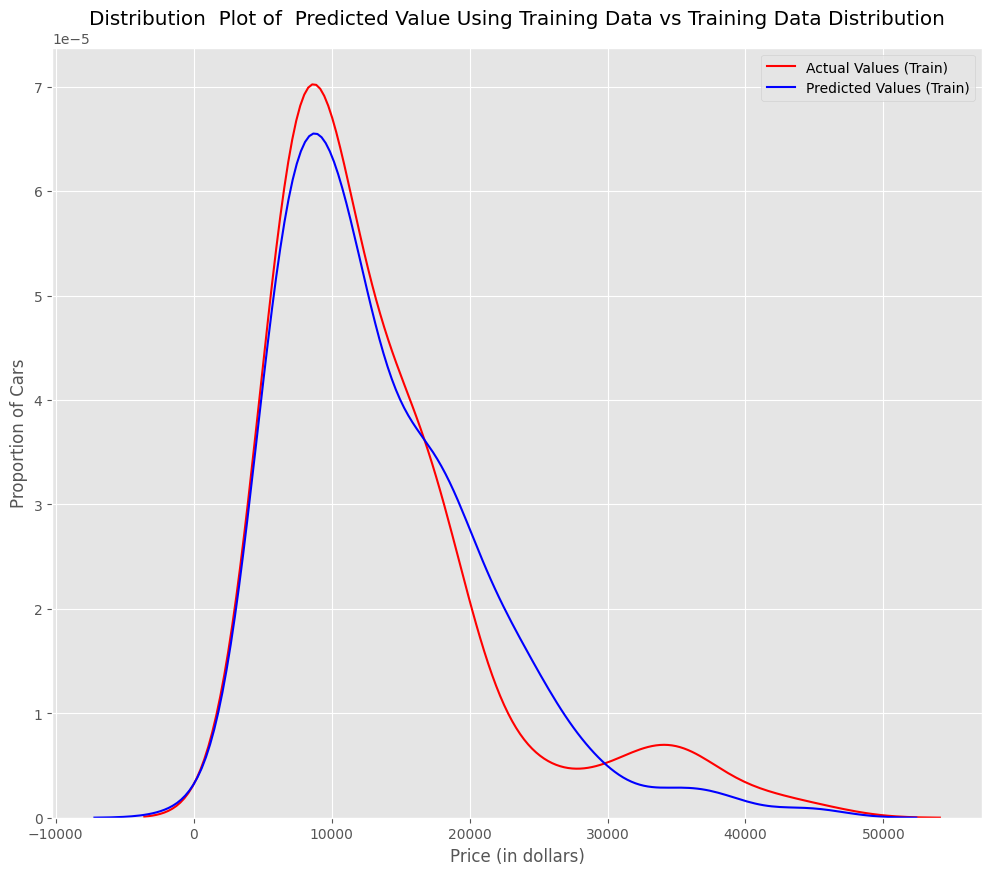

In [28]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

**Figure 1**: Plot of predicted values using the training data compared to the actual values of the training data. 


So far, the model seems to be doing well in learning from the training dataset. But what happens when the model encounters new data from the testing dataset? When the model generates new values from the test data, we see the distribution of the predicted values is much different from the actual target values. 


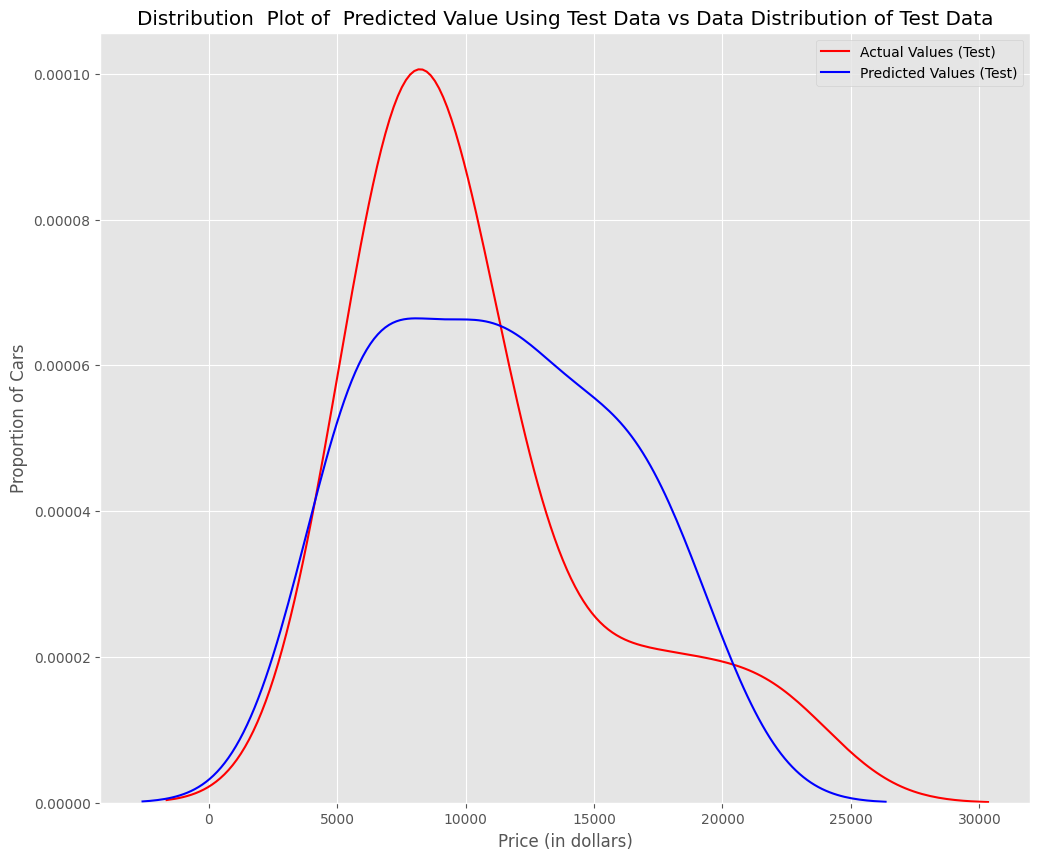

In [29]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

**Figure 2**: Plot of predicted value using the test data compared to the actual values of the test data. 


Comparing `Figure 1` and `Figure 2`, it is evident that the distribution of the test data in Figure 1 is much better at fitting the data. This difference in Figure 2 is apparent in the range of 5000 to 15,000. This is where the shape of the distribution is extremely different. Let's see if **polynomial regression** also exhibits a drop in the prediction accuracy when analysing the test dataset.


In [30]:
from sklearn.preprocessing import PolynomialFeatures

<h4>Overfitting</h4>
<p>Overfitting occurs when the model fits the noise, but not the underlying process. Therefore, when testing your model using the test set, your model does not perform as well since it is modelling noise, not the underlying process that generated the relationship. Let's create a degree 5 polynomial model.</p>


Let's use 55 percent of the data for training and the rest for testing:


In [31]:
# split the data into train and test set
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

We will perform a degree 5 polynomial transformation on the feature <b>'horsepower'</b>. 


In [32]:
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5)

Now, let's create a Linear Regression model "poly" and train it.


In [33]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression()

We can see the output of our model using the method "predict." We assign the values to "yhat".


In [34]:
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([ 6728.65571575,  7307.9879184 , 12213.78778443, 18893.24786348,
       19995.95173556])

Let's take the first five predicted values and compare it to the actual targets. 


In [35]:
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [ 6728.65571575  7307.9879184  12213.78778443 18893.24786348]
True values: [ 6295. 10698. 13860. 13499.]


We will use the function "PollyPlot" that we defined at the beginning of the lab to display the training data, testing data, and the predicted function.


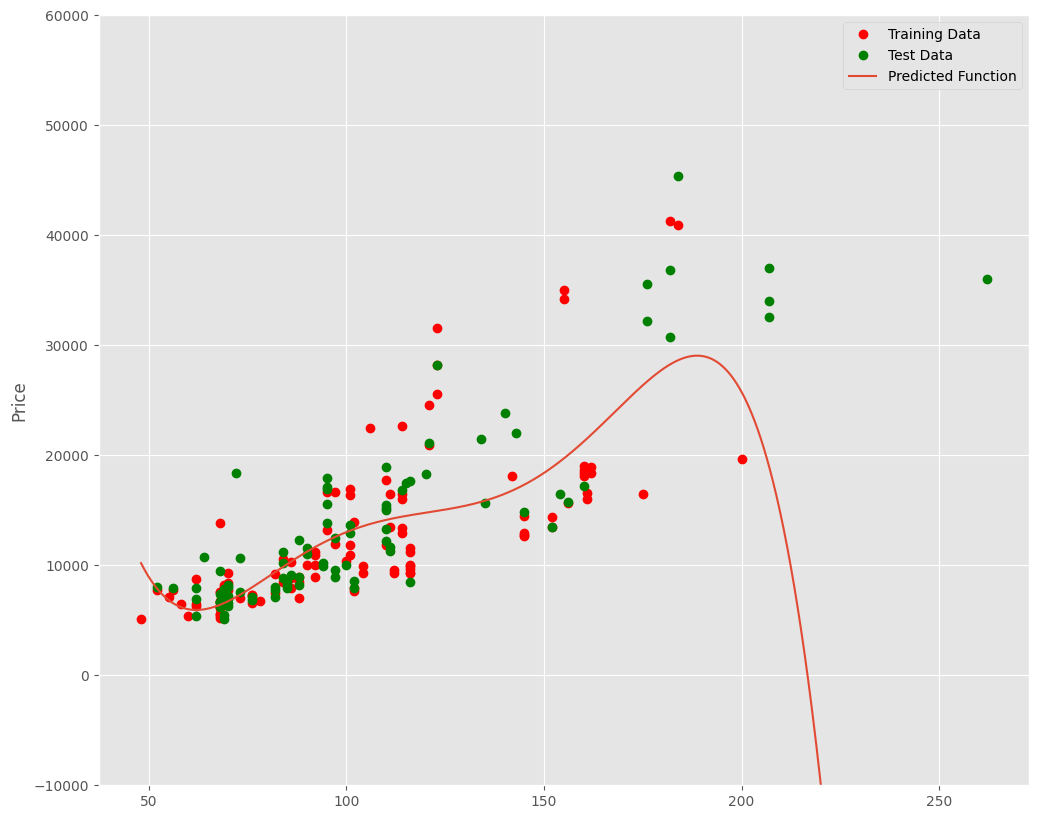

In [38]:
PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly, pr)

**Figure 3**: A polynomial regression model where red dots represent training data, green dots represent test data, and the pink line represents the model prediction. 


We see that the estimated function appears to track the data but around 200 horsepower, the function begins to diverge from the data points. 


 R^2 of the training data:


In [39]:
poly.score(x_train_pr, y_train)

0.5567716902123356

 R^2 of the test data:


In [40]:
poly.score(x_test_pr, y_test)

-29.871340866226024

We see the R^2 for the training data is 0.5567 while the R^2 on the test data was -29.87.  The lower the R^2, the worse the model. **A negative R^2 is a sign of overfitting**.


Let's see how the `R^2 changes on the test data` for different order polynomials and then plot the results:


Text(3, 0.75, 'Maximum R^2 ')

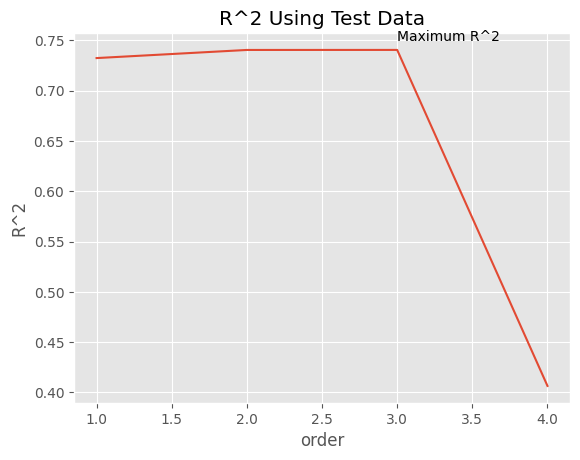

In [41]:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    
    x_test_pr = pr.fit_transform(x_test[['horsepower']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')    

We see the R^2 gradually increases until an order three polynomial is used. Then, the R^2 dramatically decreases at an order four polynomial.


The following function will be used in the next section. Please run the cell below.


In [42]:
def f(order, test_data):
    
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = test_data, random_state=0)
    
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    
    PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly, pr)

The following interface allows you to experiment with different polynomial orders and different amounts of data. 


In [43]:
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #4a):</h1>

<b>We can perform polynomial transformations with more than one feature. Create a "PolynomialFeatures" object "pr1" of degree two.</b>
</div>


In [44]:
# create PolynomialFeatures object 
pr1 = PolynomialFeatures(degree = 2)

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #4b): </h1>

<b> 
 Transform the training and testing samples for the features 'horsepower', 'curb-weight', 'engine-size' and 'highway-mpg'. Hint: use the method "fit_transform".</b>
</div>


In [45]:
x_train_pr1 = pr1.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

x_test_pr1 = pr1.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #4c): </h1>
<b> 
How many dimensions does the new feature have? Hint: use the attribute "shape".
</b>
</div>


In [46]:
x_train_pr1.shape

(110, 15)

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #4d): </h1>

<b> 
Create a linear regression model "poly1". Train the object using the method "fit" using the polynomial features.</b>
</div>


In [47]:
poly1 = LinearRegression()
poly1.fit(x_train_pr1, y_train)

LinearRegression()

 <div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #4e): </h1>
<b>Use the method  "predict" to predict an output on the polynomial features, then use the function "DistributionPlot" to display the distribution of the predicted test output vs. the actual test data.</b>
</div>


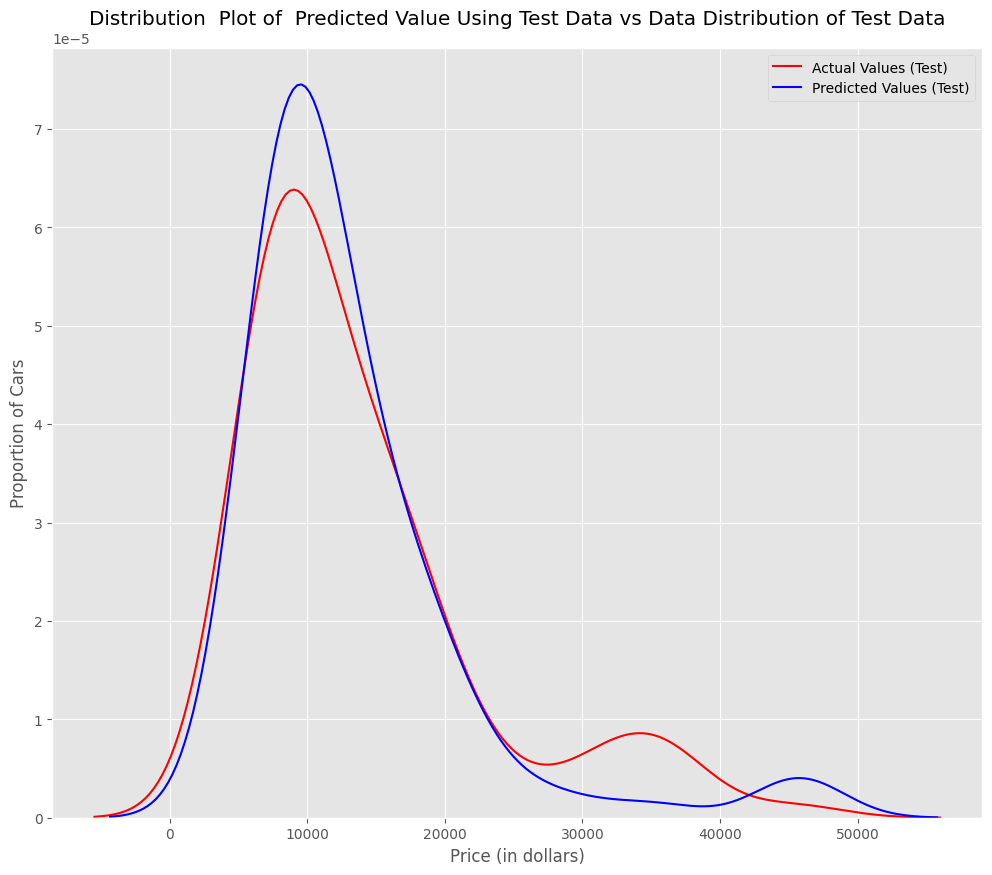

In [48]:
yhat_test1 = poly1.predict(x_test_pr1)

Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'

DistributionPlot(y_test, yhat_test1, "Actual Values (Test)", "Predicted Values (Test)", Title)

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #4f): </h1>

<b>Using the distribution plot above, describe (in words) the two regions where the predicted prices are less accurate than the actual prices.</b>
</div>


<h2 id="ref3">Part 3: Ridge Regression</h2> 


**Ridge Regression** is a method used to make predictions based on data. Imagine you have a bunch of data points that represent different variables, like age, income, and education level, and you want to predict something, like a person's height. **Ridge Regression** helps you find the best mathematical equation or line that fits the data points and makes accurate predictions.

But here's the catch: sometimes, the variables are related to each other. For example, age and income might be correlated, meaning they tend to go together. This can make it difficult for the prediction equation to work properly because it may give too much importance to one variable and not enough to others.

**Ridge Regression** solves this problem by adding a special term to the prediction equation. This extra term makes sure that the equation doesn't get too complicated and keeps the variables in check. It prevents any one variable from having too much influence on the predictions. It's like having a referee that keeps things fair between the variables.

So, **Ridge Regression** helps you find the best prediction equation by considering all the variables together and making sure they play nicely with each other. It helps prevent overfitting, which is when the equation fits the training data perfectly but doesn't work well on new, unseen data.

Overall, **Ridge Regression** is a technique that helps you make accurate predictions by taking into account the relationships between variables and preventing any single variable from overpowering the predictions.

In this section, we will review Ridge Regression and see how the parameter alpha changes the model. Just a note, here our test data will be used as validation data.


 Let's perform a degree two polynomial transformation on our data. 


In [49]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

 Let's import  <b>Ridge</b>  from the module <b>linear models</b>.


In [50]:
from sklearn.linear_model import Ridge

**Regularization Parameter (alpha)**<br>
Think of alpha as a dial that controls the complexity of the Ridge Regression model. When you adjust the value of alpha, you are essentially controlling how much importance the model should give to reducing the size of the coefficients (weights) of the features in the equation.

- If you set a low alpha value (close to 0), it means the model is not too concerned about reducing the size of the coefficients. In this case, the Ridge Regression model will behave similar to a regular linear regression model, potentially giving more weight to individual features. This could lead to overfitting if you have a lot of features or if they are highly correlated.

- On the other hand, if you set a high alpha value, it means the model strongly emphasizes reducing the size of the coefficients. This helps to simplify the model and prevent any one feature from dominating the predictions. Ridge Regression with a higher alpha tends to give more balanced importance to the features and helps in handling multicollinearity.

The optimal value of alpha depends on the specific dataset and problem at hand. A larger alpha value will provide stronger regularization and simpler models, while a smaller alpha value will allow more flexibility and potentially better fit to the training data.

Finding the right alpha value often involves using techniques like `cross-validation` or `grid search` to evaluate different values and select the one that yields the best performance on unseen data.

Let's create a Ridge regression object, setting the `regularization parameter (alpha)` to 0.1 


In [53]:
RidgeModel=Ridge(alpha=0.1)

Like regular regression, you can fit the model using the method <b>fit</b>.


In [54]:
RidgeModel.fit(x_train_pr, y_train)

Ridge(alpha=0.1)

 Similarly, you can obtain a prediction: 


In [55]:
yhat = RidgeModel.predict(x_test_pr)

Let's compare the first five predicted samples to our test set: 


In [56]:
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [ 6567.83081933  9597.971514   20836.22326844 19347.69543463]
test set : [ 6295. 10698. 13860. 13499.]


We select the value of alpha that minimizes the test error. To do so, we can use a for loop. We have also created a progress bar to see how many iterations we have completed so far.


In [57]:
from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RidgeModel = Ridge(alpha=alpha) 
    RidgeModel.fit(x_train_pr, y_train)
    test_score, train_score = RidgeModel.score(x_test_pr, y_test), RidgeModel.score(x_train_pr, y_train)
    
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|█████| 1000/1000 [00:17<00:00, 57.91it/s, Test Score=0.564, Train Score=0.859]


We can plot out the value of R^2 for different alphas: 


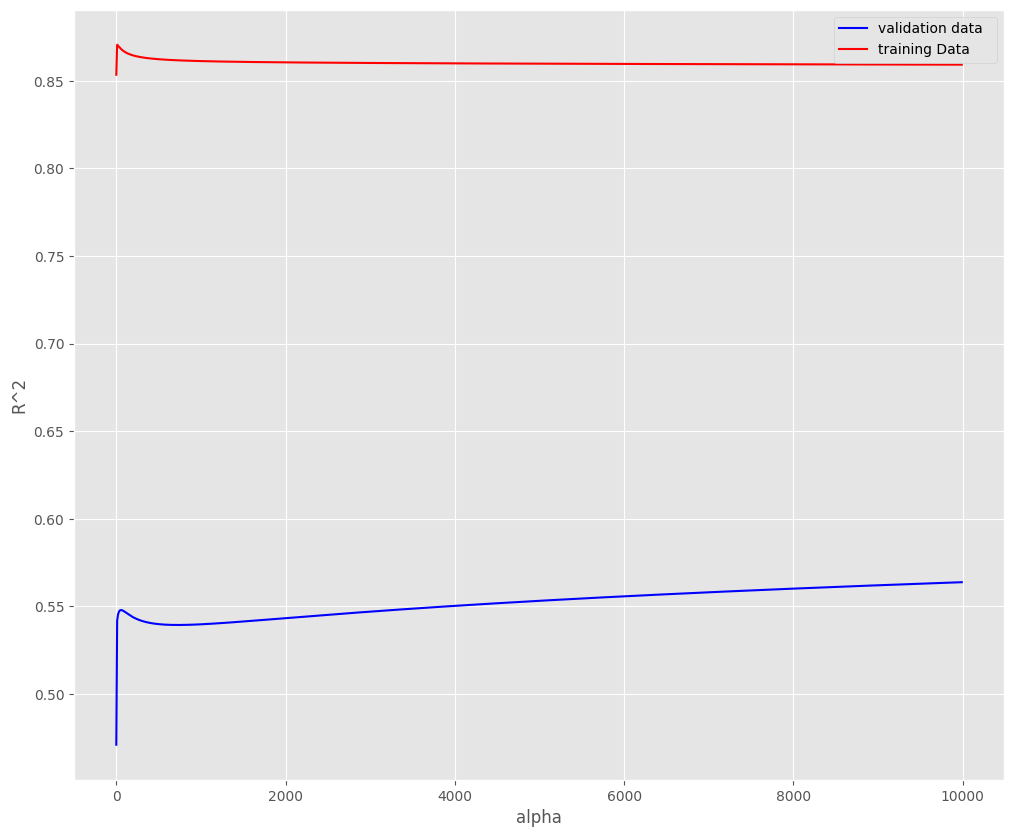

In [60]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha, Rsqu_test,'b' ,label='validation data  ')
plt.plot(Alpha, Rsqu_train, 'r', label='training Data ')

plt.xlabel('alpha')
plt.ylabel('R^2')

plt.legend()

**Figure 4**: The red line represents the R^2 of the validation data, and the red line represents the R^2 of the training data. The x-axis represents the different values of Alpha. 


Here the model is built and tested on the same data, so the training and test data are the same.

The red line in Figure 4 represents the R^2 of the training data. As alpha increases the R^2 decreases. Therefore, as alpha increases, the model performs worse on the training data

The blue line represents the R^2 on the validation data. As the value for alpha increases, the R^2 increases and converges at a point.


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #5): </h1>

Perform Ridge regression. Calculate the R^2 using the polynomial features, use the training data to train the model and use the test data to test the model. The parameter alpha should be set to 10.
</div>


In [61]:
RigeModel = Ridge(alpha=10) 
RigeModel.fit(x_train_pr, y_train)
RigeModel.score(x_test_pr, y_test)

0.5418576440208938

<h2 id="ref4">Part 4: Grid Search</h2>


<h4> Hyperparameter </h4>
<div class='alert alert-info'> In machine learning, hyperparameters are parameters that are not learned directly from the data but are set by the user before training the model. These parameters define the behavior and characteristics of the model during the training process.

Alpha in Ridge Regression is considered a hyperparameter because it is not learned from the data but is chosen by the user. It controls the regularization strength in Ridge Regression, influencing the trade-off between model complexity and training error.</div>

The term alpha is a hyperparameter. Sklearn has the class <b>GridSearchCV</b> to make the process of finding the best hyperparameter simpler.


Let's import <b>GridSearchCV</b> from  the module <b>model_selection</b>.


In [62]:
from sklearn.model_selection import GridSearchCV

We create a dictionary of parameter values:


In [63]:
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

Create a Ridge regression object:


In [64]:
RR=Ridge()
RR

Ridge()

Create a ridge grid search object:


In [67]:
Grid1 = GridSearchCV(RR, parameters1,cv=4)

In order to avoid a deprecation warning due to the iid parameter, we set the value of iid to "None".

Fit the model:


In [68]:
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

The object finds the best parameter values on the validation data. We can obtain the estimator with the best parameters and assign it to the variable BestRR as follows:


In [69]:
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=10000)

 We now test our model on the test data:


In [70]:
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.841164983103615

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #6): </h1>
Perform a grid search for the alpha parameter and the normalization parameter, then find the best values of the parameters:
</div>


In [73]:
parameters2= [{'alpha': [0.001,0.1,1, 10, 100, 1000,10000,100000,100000]} ]
Grid2 = GridSearchCV(Ridge(), parameters2,cv=4)
Grid2.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']],y_data)
Grid2.best_estimator_



Ridge(alpha=10000)

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
